In [1]:
from mlgrad.risk import ERisk, ERiskGB
from mlgrad.loss import SquareErrorLoss, ErrorLoss
from mlgrad.model import LinearFuncModel, SigmaNeuronModel, FFNetworkModel, \
                        FFNetworkFuncModel, SigmaNeuronModelLayer, LinearModel
from mlgrad.func import SoftPlus, Sqrt, Sigmoidal, HingeSqrt, Arctang, Absolute

from mlgrad import erm_fg, erm_irgd, fg, erm_fg, erisk
from mlgrad.regr import m_regression_irls
from mlgrad.af import averaging_function
from mlgrad.weights import MWeights

import numpy as np

In [43]:
def gendataset(N=70, a=3., b=9., q=0.4, dy=2.):
    M = int(q*N)
    X0 = np.linspace(-8., 8., N+1)
    Y0 = 2.+3.*X0
    Y0 += 2*dy*np.random.random(N+1)-dy
    if q > 0:
        X1 = a*np.random.random(M) - a - 8
        Y1 = b*(2*np.random.random(M)-1)
        Y1 += 2.+3.*X1 + 50
        X2 = a*np.random.random(M) - a + 9
        Y2 = b*(2*np.random.random(M)-1)
        Y2 += 2.+3.*X2 - 50
        X = np.hstack((X0, X1, X2))
        Y = np.hstack((Y0, Y1, Y2))
    else:
        X = X0
        Y = Y0
    Xs = X.reshape(-1,1)
    xrange = np.linspace(-8., 8., 10).reshape(-1,1)
    return X, Y, Xs, M, xrange

In [44]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

import sys
print(sys.version)

3.9.12 (main, Mar 24 2022, 13:02:21) 
[GCC 11.2.0]


In [45]:
from mlgrad.boost.gb_regression import gb_fit, gb_fit_agg

In [46]:
N = 30
q = 0.4
dy = 4
X1, Y1, X1s, M, xrange0  = gendataset(N, q=q, dy=dy)
X0, Y0, X0s, M0, xrange0  = gendataset(N, q=0, dy=dy)
Q = 2*M / (N+2.*M) * 100
alpha = 1.0 - Q/100
print(Q, X1.shape)

44.44444444444444 (55,)


In [78]:
def new_model(N):
    mod = SigmaNeuronModel(Sigmoidal(0.5), N)
    mod.init_param()
    return mod

m = 30

gb = gb_fit(X1s, Y1, new_model, h=0.01, tol=1.0e-8, n_iter=m)
lfm, lvals = gb.complex_model, gb.lvals
# print(np.asarray(lfm.weights))

In [79]:
gb_agg = gb_fit_agg(X1s, Y1, new_model, alpha=alpha, h=0.01, tol=1.0e-8, n_iter=m)
lfm_agg, lvals_agg = gb_agg.complex_model, gb_agg.lvals

# print(np.asarray(lfm_agg.weights))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


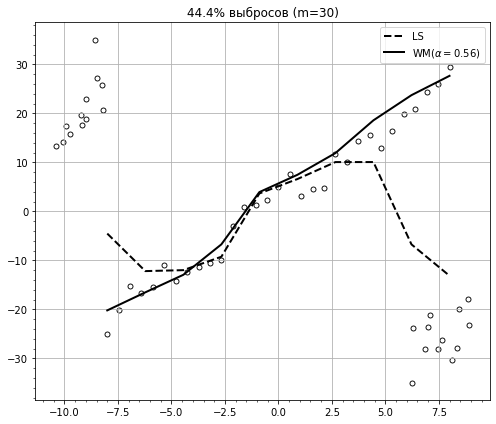

In [80]:
plt.figure(figsize=(7, 6))
plt.title("%.1f%% выбросов (m=%s)" % (Q,m))
plt.scatter(X1, Y1, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9) #, label='data')
plt.plot(xrange0, lfm.evaluate_all(xrange0), color='k', linewidth=2., label=r'LS', linestyle='--')
plt.plot(xrange0, lfm_agg.evaluate_all(xrange0), color='k', linewidth=2., label=r'WM($\alpha=%.2f$)' % alpha, linestyle='-')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.savefig("fig/gb_linear_%.0f_%s.eps" % (Q,m))
plt.show()